## Toy Model 1: 2 spatial modes with different oscillating frequencies

### Created by Yuying Liu, 09/23/2019

$$\Phi(x, t) = u(x)cos(\omega_0 t) + v(x)cos(\omega_1 t + \frac{\pi}{4})$$

In [1]:
# imports
import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import torch_cae_multilevel_V4 as net

## MrCAE

Below is the progressive training framework. 
One could have flexible control over each training step: low-level models are cheap to obtain, and higher level models are built based on them -- one can always revert back to the previous level and adjust the parameters to re-train the model if it is not satisfying. 

In [3]:
# init model & load data
data_path = '../data/toy1_longer'#toy1.npy'
model_path = '../model/toy1_longer/space_models'
result_path = '../result/toy1_longer/'

level=0
filter_group_num=0

to_decode =np.load(os.path.join(result_path, "result_L{}_{}.npy".format(level, filter_group_num)))
# np.save(full_data_path, scaled_Phi.T)
print(to_decode.shape)

to_decode = to_decode.reshape(999,3,3)
print(to_decode.shape)

to_decode_path = os.path.join(data_path, 'to_decode.npy')
np.save(to_decode_path, to_decode)

# np.save()
dataset = net.MultiScaleDynamicsDataSet(to_decode_path, n_levels=5)

(1, 999, 9)
(999, 3, 3)
self.data.shape =  torch.Size([999, 1, 3, 3])


C:\Users\16kat\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
# trained models at different levels
models = {}
print('model names: model_L{level}_{index}')
for file_name in sorted(os.listdir(model_path)):
#     print(file_name.split('.'))
    model_name, _ = file_name.split('.')
    print(model_name)
    models[model_name] = torch.load(os.path.join(model_path, file_name))

# inds = np.array(sorted(dataset.test_inds))
# dataset.test_inds = inds
# n_snapshots = len(inds)
# n_samples = 6
# n_step = n_snapshots // 6

model = models['model_L0_0']

model names: model_L{level}_{index}
model_L0_0


In [5]:
def apply_local_op(data, mode='conv', ave=True):
    """
    :param data: data to be processed
    :param device: which device is the data placed in?
    :param mode: string, 'conv' or 'deconv'
    :param ave: if to use local average or sample the center
    :return: processed data
    """
    print(" data.size()= ",  data.size())
    in_channels, out_channels, n_per_dim, _ = data.size()
    n = min(in_channels, out_channels)
    print("data.size() = ", data.size())
#     in_channels= 1
#     out_channels = 1
#     n = 1
    op = torch.nn.Conv2d(out_channels, out_channels, 3, stride=2, padding=0)
    op.weight.data = torch.zeros(op.weight.data.size())
    print("op.weight.data = ", op.weight.data.size())
    op.bias.data = torch.zeros(op.bias.data.size())
    for i in range(n):
        print("op.weight.data[i, i, 1, 1].size() = ", op.weight.data[i, i, 1, 1].size())
        op.weight.data[i, i, 1, 1] = torch.ones(op.weight.data[i, i, 1, 1].size())

    # make them non-trainable
    for param in op.parameters():
        param.requires_grad = False

    transformed = np.zeros((in_channels, out_channels, n_per_dim//2, n_per_dim//2))
    print("transformed shape = ", transformed.shape)
#     for i in range(in_channels//)
#     print(op(data).shape)
    return op(data)


#save encoded data

to_decode_path = os.path.join(data_path, 'to_decode.npy')
to_decode_raw = np.load(to_decode_path)
print("to_decode_raw shape = ", to_decode_raw.shape)
# ghj

n_levels = 5
level = 0
# print(data.shape)
to_decode = torch.tensor(to_decode_raw).unsqueeze(1).float()
print("to_decode shape = ", to_decode.shape)

# to_encode_right_size = torch.zeros((to_encode.size()))

# n_runs, _,_,_ = to_encode.size()

# for r in range(n_runs):
#     print("r = ", r)
# to_encode_this = to_encode[0].unsqueeze(1).float()
# for i in range(n_levels - level - 1):
#     to_decode = apply_local_op((to_decode), ave=False)
# #     to_encode_right_size[r, :,0,:,:] = to_encode_data
    
# print("to_encode shape = ", to_decode.shape)


# return train_data
    
# np.save(full_data_path, scaled_Phi.T)

# dataset_encode = net.MultiScaleDynamicsDataSet(to_encode_path, n_levels=5)

level = 0
filter_group_num = 0
model = models['model_L{}_{}'.format(level, filter_group_num)]
# data = dataset_encode.obtain_data_at_current_level_all(level=0)

decoded = model.decode(to_decode, model.cur_level)#, verbose = True)
# decoded = model.decode(encoded, model.cur_level)

print(decoded.shape)
# print(decoded.shape)

#save encoded data 
# np.save(os.path.join(data_path, 'data_L{}_{}'.format(level, filter_group_num)), encoded.detach().numpy())

to_decode_raw shape =  (999, 3, 3)
to_decode shape =  torch.Size([999, 1, 3, 3])
torch.Size([999, 1, 7, 7])


torch.Size([999, 1, 7, 7])


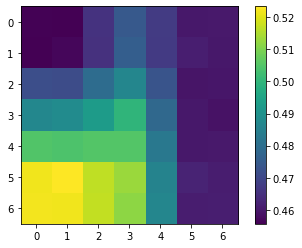

to_encode_raw shape =  (5000, 127, 127)
to_encode shape =  torch.Size([5000, 1, 127, 127])


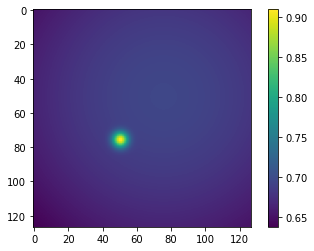

In [8]:
print(decoded.shape)
plt.imshow(decoded[-1,0].detach().numpy())
plt.colorbar()
plt.show()


to_encode_path = os.path.join(data_path, 'data.npy')
# to_encode_raw = np.load(to_encode_path)
print("to_encode_raw shape = ", to_encode_raw.shape)
# ghj

n_levels = 5
level = 0
# print(data.shape)
to_encode = torch.tensor(to_encode_raw).unsqueeze(1).float()
print("to_encode shape = ", to_encode.shape)

plt.imshow(to_encode[-1,0])
plt.colorbar()
plt.show()

# truth = 

In [ ]:
def animate(snapshots, file_name = "animation.gif"):


    fps = 30
    nSeconds = len(snapshots)/fps
    fig = plt.figure( figsize=(8,8) )

#     print(np.min(snapshots))
    a = snapshots[0,0,:,:].T
    im = plt.imshow(a, interpolation='none', aspect='auto', vmin=np.min(snapshots), vmax=np.max(snapshots))
    plt.colorbar()
    
    print("Animating, may take a little while...")

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(snapshots[i,0,:,:,].T)
        return [im]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = int(nSeconds * fps),
                                   interval = 1000 / fps, # in ms
                                   )
    writergif = animation.PillowWriter(fps=30)
    anim.save(file_name, writer=writergif)#, fps=30)


    print('Done! gif saved to ', file_name)

    


In [ ]:
print(decoded.shape)
# animate(decoded.detach().numpy(), "L0_0_test_results.gif")

In [ ]:
print(decoded.shape)
truth = to_encode[:len(decoded)]

# print(truth.shape)

n_levels = 5
level = 0
truth = torch.tensor(truth)#.T.unsqueeze(1).float()

print("truth shape = ", truth.shape)

for i in range(n_levels - level - 1):
    truth = apply_local_op(truth, ave=False)
    
print("truth shape = ", truth.shape)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
fully_resolved, loss, resolved_map = net.check_pixel_level_loss(decoded, truth, 0.001, device, w=0.5)

In [ ]:
def check_pixel_level_loss(d1, d2, tol, device, w=0.5):
    """
    :param d1: data 1
    :param d2: data 2
    :param tol: a float, represent the tolerance
    :param device: device
    :param w: loss = w * mse_loss + (1 - w) * max_loss
    :return: a boolean value, if error satisfies the tolerance,
             a torch tensor of overall loss distribution,
             and a boolean torch tensor
    """
    assert isinstance(tol, float), print('tol should be a float!')

    n_timesteps, _, n_per_dim, _ = d1.size()
    print("d1.size = ", d1.size())
    d1 = d1.flatten(start_dim = 2)
    print("d1.size = ", d1.size())
    d2 = d2.flatten(start_dim = 2)
    loss1 = torch.mean((d1 - d2)**2, dim=-1, keepdim=True)
    loss2 = torch.max((d1 - d2)**2, dim=-1, keepdim=True)[0]
    loss = w * loss1 + (1 - w) * loss2
#     loss_summary = apply_local_op(loss, device).squeeze()

    return loss.max() <= tol, loss, loss <= tol

fully_resolved, loss, resolved_map = check_pixel_level_loss(decoded, truth, 0.001, device, w=0.5)

print(loss.shape)

In [ ]:
plt.semilogy(loss[:,0,0].detach().numpy())

In [ ]:
plt.imshow(decoded[0,0].detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(truth[0,0].detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(loss[0,0].detach().numpy())
plt.colorbar()

print(np.mean(loss[0,0].detach().numpy()))